# Worked problem: The string problem

Ignore the following drawing code.

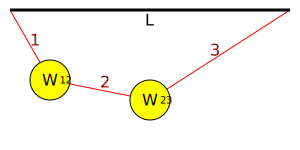

In [1]:
from IPython.display import SVG
from collections import namedtuple

V = namedtuple("V", ["x", "y"])

p0 = V(10, 10)
p1 = V(50, 80)
p2 = V(150, 100)
p3 = V(290, 10)


def sub(x):
    return f'<tspan baseline-shift="sub" font-size="10">{x}</tspan>'


SVG(
    f"""
<svg viewBox="0 0 300 150" xmlns="http://www.w3.org/2000/svg">
  <style>
    ellipse {{stroke:#000; fill:yellow;}}
    text {{text-anchor:middle; alignment-baseline:central;}}
    .string {{stroke:#F00;stroke-width:1;}}
    .tstring {{fill:red}}
    .bar {{stroke:#000;stroke-width:3;}}
  </style>

  <line x1="{p0.x}" y1="{p0.y}" x2="{p1.x}" y2="{p1.y}" class="string"/>
  <line x1="{p1.x}" y1="{p1.y}" x2="{p2.x}" y2="{p2.y}" class="string"/>
  <line x1="{p2.x}" y1="{p2.y}" x2="{p3.x}" y2="{p3.y}" class="string"/>

  <g>
    <line x1="{p0.x}" y1="{p0.y}" x2="{p3.x}" y2="{p3.y}" class="bar"/>
    <text x="{(p0.x+p3.x)/2}" y="{p0.y + 10}">L</text>
  </g>
  <g>
    <ellipse cx="{p1.x}" cy="{p1.y}" rx="20" ry="20"/>
    <text x="{p1.x}" y="{p1.y}">W{sub(12)}</text>
  </g>
  <g>
    <ellipse cx="{p2.x}" cy="{p2.y}" rx="20" ry="20"/>
    <text x="{p2.x}" y="{p2.y}">W{sub(23)}</text>
  </g>
  <text x="{(p0.x+p1.x)/2 + 5}" y="{(p0.y+p1.y)/2 - 5}" class="tstring">1</text>
  <text x="{(p1.x+p2.x)/2 + 5}" y="{(p1.y+p2.y)/2 - 8}" class="tstring">2</text>
  <text x="{(p2.x+p3.x)/2 - 5}" y="{(p2.y+p3.y)/2 - 5}" class="tstring">3</text>
</svg>
"""
)

We'll define $T_n$ to be the tension, $L_n$ to be the length, and $\theta_n$ to be the angle from horizantal for each string labeled $n$.

First, we assume the horizontal lengths add up to L:

$$
L_1 \cos \theta_1 + L_2 \cos \theta_2  + L_3 \cos \theta_3 = L \tag{1}
$$

Then, we can assume that the vertical lengths cancel:

$$
L_1 \sin \theta_1 + L_2 \sin \theta_2  - L_3 \sin \theta_3 = 0
\tag{2}
$$

(We are explicilty defining theta to be the positive angle from the $x$ axis)

We can also use trigometric identites:

$$
\begin{align}
\sin^2 \theta_1 + \cos^2 \theta_1 &=& 1 \tag{3} \\
\sin^2 \theta_2 + \cos^2 \theta_2 &=& 1 \tag{4} \\
\sin^2 \theta_3 + \cos^2 \theta_3 &=& 1 \tag{5}
\end{align}
$$

Finally, we can use physics to get 4 force equations, two for each weight.

$$
\begin{align}
T_1 \sin \theta_1 - T_2 \sin \theta_2 - W_{12} &=& 0 \tag{6} \\
T_1 \cos \theta_1 - T_2 \cos \theta_2 &=& 0 \tag{7} \\
T_2 \sin \theta_2 + T_3 \sin \theta_3 - W_{23} &=& 0 \tag{8} \\
T_2 \cos \theta_2 - T_3 \cos \theta_3 &=& 0 \tag{9} \\
\end{align}
$$

Now, we have our unknowns:

$$
\mathbf{x} = \left(
\begin{matrix}
\sin{\theta_1} \\
\sin{\theta_2} \\
\sin{\theta_3} \\
\cos{\theta_1} \\
\cos{\theta_2} \\
\cos{\theta_3} \\
T_1 \\
T_2 \\
T_3 \\
\end{matrix}
\right)
$$

But, we have the problem that our solution is non-linear:

$$
f(\mathbf{x}) = \left(
\begin{matrix}
3 x_5 + 4 x_4 + 4 x_5 - 8 \\
3 x_0 + 4 x_1 + 4 x_2 \\
x_6 x_0 - x_7 x_1 - 10 \\
x_6 x_3 - x_7 x_4 \\
x_7 x_1 + x_8 x_2 - 20 \\
x_7 x_4 + x_8 x_6 \\
x_0^2 + x_3^2 - 1 \\
x_1^2 + x_4^2 - 1 \\
x_2^2 + x_5^2 - 1 \\
\end{matrix}
\right) = 0
$$

Unlike the book, I'm using 0 based indexing. Let's use SymPy to give us some symbolic manipulation abilities:

In [1]:
import numpy as np
import sympy as s

s.init_printing()

In [2]:
x = s.Matrix(s.symbols("x:10"))

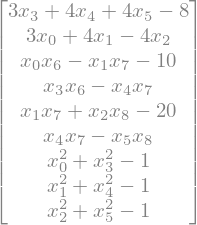

In [3]:
f = s.Matrix(
    [
        3 * x[3] + 4 * x[4] + 4 * x[5] - 8,
        3 * x[0] + 4 * x[1] - 4 * x[2],
        x[6] * x[0] - x[7] * x[1] - 10,
        x[6] * x[3] - x[7] * x[4],
        x[7] * x[1] + x[8] * x[2] - 20,
        x[7] * x[4] - x[8] * x[5],
        x[0] ** 2 + x[3] ** 2 - 1,
        x[1] ** 2 + x[4] ** 2 - 1,
        x[2] ** 2 + x[5] ** 2 - 1,
    ]
)
f

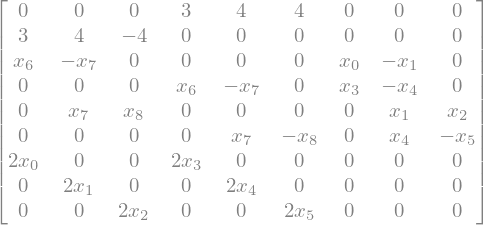

In [5]:
df = s.Matrix([f.diff(x[i]).T for i in range(9)]).T
df

In [6]:
x_arr = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0])
eps = 1e-3

for it in range(15):

    # Compute f and its derivative
    y = f.evalf(subs={a: b for a, b in zip(x, x_arr)})
    M = df.evalf(subs={a: b for a, b in zip(x, x_arr)})

    # Convert these SymPy contraptions into Numpy
    y = np.asarray(y).astype(np.float64).flatten()
    M = np.asarray(M).astype(np.float64)

    # Solve for Δx
    Δx = np.linalg.solve(M, -y)

    # Compute new x
    x_arr += Δx

    errX = abs(Δx)
    errX[x_arr != 0] /= abs(x_arr[x_arr != 0])  # Relitave error only if x is not 0
    errF = abs(y)

    if np.all(errX <= eps) and np.all(errF <= eps):
        break

print("Number of iterations = ", it + 1)
print("Final Solution:")
for i in range(9):
    print(f"x_arr[{i}] = {x_arr[i]}")

Number of iterations =  8
Final Solution:
x_arr[0] = 0.7610026921032024
x_arr[1] = 0.2649538102798601
x_arr[2] = 0.8357058293572619
x_arr[3] = 0.648748720702048
x_arr[4] = 0.9642611048977284
x_arr[5] = 0.5491773545757356
x_arr[6] = 17.16020978458048
x_arr[7] = 11.54527968431142
x_arr[8] = 20.271528044627093
